# Outline for Friday, April 30
## Pseudo-randomness

You will be able to:
 - Define "pseudorandomness" and describe generally how it works
 - Create (pseudo)randomness using random.choice()
 - Repeat (pseudo)random experiments using `seeds`
 - Reason about the `significance` of an experimental result
     - Using the Law of Large Numbers
     
**Today is the last day to submit your course evaluations**
 - At time of recording, 32% have submitted evaluations (thank you!)
 - If you haven't yet, you can submit your course evals through aefis.wisc.edu
 
**Exam review today 2:15-3:30 Madison time on the course Discord**

**Exam THIS SUNDAY. Take it through Canvas just like the mid-terms.**

In [1]:
import pandas as pd
import numpy as np
from numpy.random import choice
from pandas import Series, DataFrame

In [2]:
%matplotlib inline

In [3]:
import matplotlib 
matplotlib.rcParams["font.size"] = 16

In [4]:
# ignore this cell - it makes the emphasized text red and uses the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

## Pseudo-random

What is it?
 - Looks like randomness
 - Usually involve very long strings of numbers, pick parts of those strings unpredictably to look like random numbers

Why do computers use it?
 - A computer is actually really bad at generating "true" randomness


<img src="coins.png">

## Which sequence of coins was generated *randomly*?  Which was *handpicked* with the goal of tricking you?

In [5]:
# Write your guess in this cell


----
### Random selection from a list

In [7]:
#choice([<option1>, <option2> <...>])
#numpy.random.choice
choice(["rock","paper","scissors"])

'paper'

----
### Make lots of choices 
- size parameter for choice function

In [8]:
choice(["rock","paper","scissors"], size=5)

array(['rock', 'rock', 'scissors', 'scissors', 'paper'], dtype='<U8')

In [10]:
#Note: optional parameter replace
choice(["rock","paper","scissors"], size=2, replace=False)

array(['scissors', 'rock'], dtype='<U8')

----
### Random series

In [11]:
Series(choice(["rock","paper","scissors"], size=5))

0    paper
1    paper
2    paper
3    paper
4     rock
dtype: object

----
### Multidimensional random Series
- choice(["rock", "paper", "scissors"], size = (ROWS, COLUMNS))
- size = (ROWS, COLUMNS))

In [12]:
choice(["rock","paper","scissors"], size=(5,2))

array([['scissors', 'rock'],
       ['paper', 'paper'],
       ['paper', 'rock'],
       ['rock', 'paper'],
       ['rock', 'paper']], dtype='<U8')

In [13]:
#DataFrame(LIST of LISTS)
DataFrame(choice(["rock","paper","scissors"], size=(5,2)))

,0,1
0,rock,paper
1,paper,rock
2,paper,scissors
3,scissors,rock
4,rock,scissors


----
### Exploring Bias - is this fair?

<AxesSubplot:>

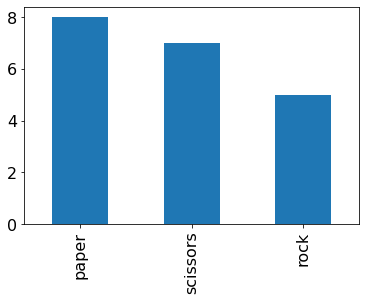

In [17]:
s = Series(choice(["rock","paper","scissors"], size=20))
vc = s.value_counts()
vc.plot.bar()

----
### Sort by item

<AxesSubplot:>

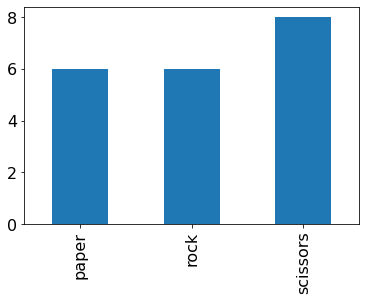

In [19]:
s = Series(choice(["rock","paper","scissors"], size=20))
vc = s.value_counts()
vc = vc.sort_index()
vc.plot.bar()

----
### Sorted as "rock", "paper", "scissors"

<AxesSubplot:>

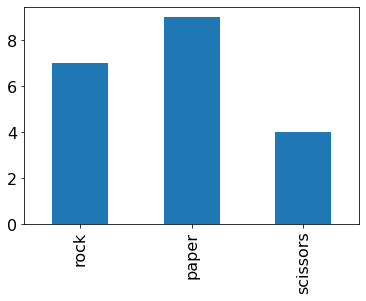

In [20]:
s = Series(choice(["rock","paper","scissors"], size=20))
vc = s.value_counts()
vc = vc[["rock","paper","scissors"]]
vc.plot.bar()

----
### Is this really fair? 

<AxesSubplot:>

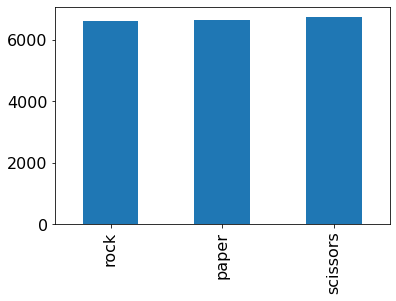

In [21]:
#Law of Large Numbers
# - Small number of trials: what looks like lots of variation in results
# - LARGE number of trials: results should look much closer to the expected (median) result
s = Series(choice(["rock","paper","scissors"], size=20000))
vc = s.value_counts()
vc = vc[["rock","paper","scissors"]]
vc.plot.bar()

----
### Control the probability of selection

rock         30261
paper        59908
scissors    209831
dtype: int64


<AxesSubplot:>

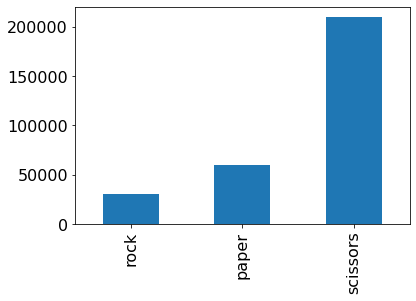

In [22]:
s = Series(choice(["rock", "paper", "scissors"], size = 300000, p = [0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Random integer shortcut

In [ ]:
Series(choice(6, size = 5))

## Seeding

Recall we used `assert` to transform a difficult to debug semantic error into an easier runtime error

Use a "random seed" to transform difficult to debug errors involving randomness into predictable and repeatable results

When a pseudorandom number generator uses a seed, it always gives the same "random" results

----
### Change over time

0    5
1    0
2    0
3    3
4    9
dtype: int32


E:\Utilities\Anaconda\Python3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
E:\Utilities\Anaconda\Python3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """


<AxesSubplot:>

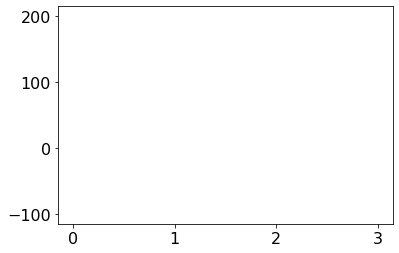

In [24]:
# Change over time
s = Series(choice(10,size=5))
percents = []
for i in range(1, len(s)):
    diff = 100 * (s[i] / s[i-1] -1)
    percents.append(diff)
print(s)
Series(percents).plot.line()

In [25]:
np.random.seed(200)
choice(1000, size = 3)

array([794, 617, 784])

In [26]:
choice(1000, size = 3)

array([836, 810, 695])

In [27]:
np.random.seed(200)
choice(1000, size = 6) #Notice all 6 numbers are the same as before!

array([794, 617, 784, 836, 810, 695])

----
### Seeding with time

In [31]:
import time
time.time()
now = int(time.time())
now
np.random.seed(now)
choice(1000, size=3)
print("Seeding with:", now) #Report which seed we used just in case we want to replicate that random trial

Seeding with: 1619799159


----
### Significance - Does the data support drawing that conclusion?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected

In [32]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials,flips)))
df

,0,1,2
0,1,0,0
1,0,1,0
2,1,1,1
3,1,0,0
4,0,0,1
5,1,1,1
6,1,1,0
7,0,0,1
8,0,0,1
9,0,1,1


In [33]:
df.sum(axis=1) #How many HEADS results in each trial

0    1
1    1
2    3
3    1
4    1
5    3
6    2
7    1
8    1
9    2
dtype: int64

In [34]:
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials,flips)))
df.sum(axis=1)

0       49
1       45
2       53
3       42
4       58
        ..
9995    51
9996    56
9997    55
9998    59
9999    53
Length: 10000, dtype: int64

In [35]:
counts = df.sum(axis=1)

In [36]:
counts[counts <= 40]

15      39
29      40
83      40
90      38
119     40
        ..
9822    36
9825    40
9834    40
9890    39
9968    39
Length: 286, dtype: int64

In [39]:
extremes = counts[(counts<=40) | (counts >=60)]
len(extremes)

584

In [40]:
#Get as a percentage
len(extremes)/trials * 100

5.84

<AxesSubplot:ylabel='Frequency'>

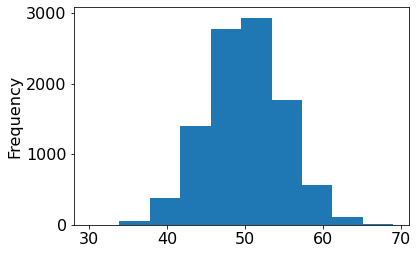

In [41]:
counts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

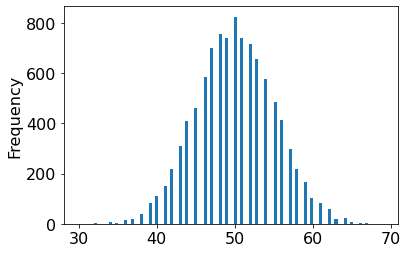

In [42]:
counts.plot.hist(bins=100)

----
### Opening example with the 16 coins - How often do we get 11 or more heads?

----
### How often do we see 7 heads in a row out of 16 coins